<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization**


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


download database file

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

import libraries

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set up connection to query data

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///m4_survey_data.sqlite

Query to check the data

In [78]:
%sql SELECT * FROM master LIMIT 4

 * sqlite:///m4_survey_data.sqlite
Done.


index,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,OrgSize,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,FizzBuzz,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,OpSys,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,Age,Trans,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",100 to 499 employees,3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,No,I was preparing for a job search,USD,United States dollar,61000.0,Yearly,61000.0,80.0,Less than once per month / Never,Home,A little below average,No,None,"No, but I think we should",Developers typically have the most influence on purchasing new technology,I have little or no influence,Windows,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,SIGH,Yes,Reddit,In real life (in person),Username,2014,Daily or almost daily,1-2 times per week,Stack Overflow was much faster,31-60 minutes,Yes,Less than once per month or monthly,Yes,"No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,22.0,No,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software is about the same,Employed full-time,New Zealand,No,Some college/university study without earning a degree,"Computer science, computer engineering, or software engineering",10 to 19 employees,12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new opportunities",Less than a year ago,Yes,I was preparing for a job search,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,Less than once per month / Never,Office,A little above average,"Yes, because I see value in code review",12.0,"Yes, it's not part of our process but the developers do it on their own",Not sure,I have some influence,MacOS,Not at all,An irresponsible use of resources,No,SIGH,Yes,Twitter,In real life (in person),Username,2013,Daily or almost daily,3-5 times per week,They were about the same,None,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,23.0,No,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per year,"OSS is, on average, of HIGHER quality than proprietary / closed source software",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or software engineering",10 to 19 employees,17,11,8,Very satisfied,Very satisfied,None,None,None,I am not interested in new job opportunities,3-4 years ago,Yes,I was preparing for a job search,USD,United States dollar,90000.0,Yearly,90000.0,40.0,All or almost all the time (I'm full-time remote),Home,A little above average,"Yes, because I see value in code review",5.0,"No, but I think we should",Developers and management have nearly equal input into purchasing new technology,I have a great deal of influence,Windows,Not at all,"Useful for decentralized currency (i.e., Bitcoin)",Yes,Yes,Yes,Twitter,In real life (in person),Username,2011,Multiple times per day,More than 10 times per week,Stack Overflow was much fas

## 1. Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


In [32]:
# Get the "ConvertedComp" data
hist = %sql SELECT ConvertedComp FROM master;

 * sqlite:///m4_survey_data.sqlite
Done.


In [33]:
# Make it a list for plotting
hist = [h[0] for h in hist if h[0] is not None] # exclude NoneType
hist[0:5]

[61000.0, 95179.0, 90000.0, 455352.0, 65277.0]

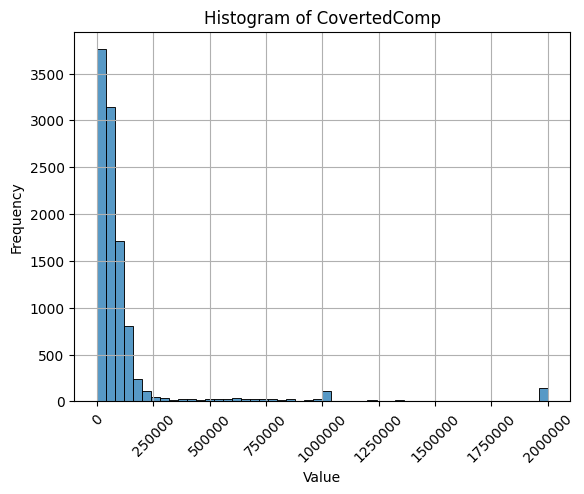

In [48]:
# Plot
plt.figure()
sns.histplot(data=hist, bins=50)
plt.title('Histogram of CovertedComp')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.show()

### Box Plots


Plot a box plot of `Age.`


In [35]:
# Get the "Age" data
age = %sql SELECT Age FROM master;

# make it a list
age = [a[0] for a in age if a[0] is not None] # exclude NoneType
age[0:5]

 * sqlite:///m4_survey_data.sqlite
Done.


[22.0, 23.0, 28.0, 26.0, 29.0]

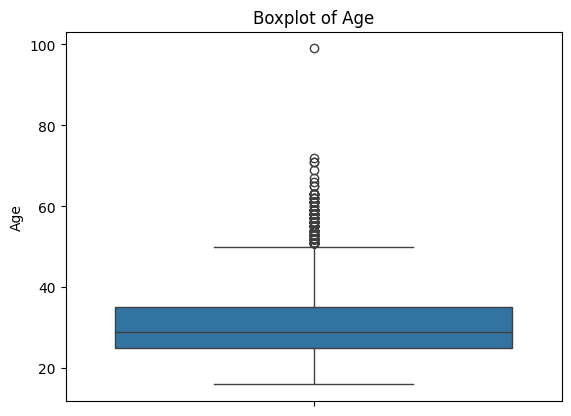

In [55]:
# plot
plt.figure()
sns.boxplot(data=age)
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

## 2. Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


In [59]:
# Get data
data = %sql SELECT Age, WorkWeekHrs FROM master;

# Create a dataframe (since we have more than one variable)
data = pd.DataFrame(data, columns=['Age', 'WorkWeekHrs'])
data.head()

 * sqlite:///m4_survey_data.sqlite
Done.


,Age,WorkWeekHrs
0,22.0,80.0
1,23.0,32.0
2,28.0,40.0
3,26.0,40.0
4,29.0,45.0


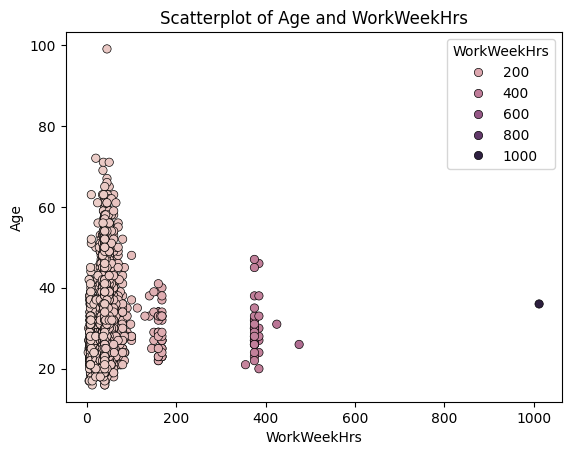

In [67]:
# Plot
plt.figure()
sns.scatterplot(data=data, y='Age', x='WorkWeekHrs', edgecolor='black', hue='WorkWeekHrs')
plt.title('Scatterplot of Age and WorkWeekHrs')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


In [68]:
# Get data
data = %sql SELECT WorkWeekHrs, CodeRevHrs, Age FROM master

# Convert to dataframe
data = pd.DataFrame(data, columns=['WorkWeekHrs', 'CodeRevHrs', 'Age'])
data.head()

 * sqlite:///m4_survey_data.sqlite
Done.


,WorkWeekHrs,CodeRevHrs,Age
0,80.0,NaN,22.0
1,32.0,12.0,23.0
2,40.0,5.0,28.0
3,40.0,NaN,26.0
4,45.0,5.0,29.0


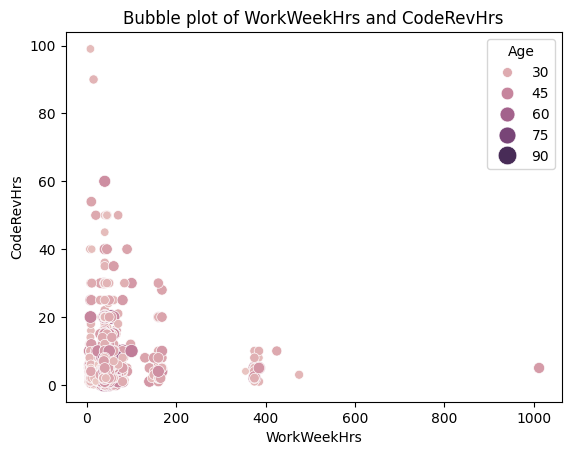

In [76]:
plt.figure()
sns.scatterplot(data=data, x='WorkWeekHrs', y='CodeRevHrs', size='Age', sizes=(20,200), hue='Age')
plt.title('Bubble plot of WorkWeekHrs and CodeRevHrs')
plt.show()

## 3. Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [85]:
#Will first look for a table in the database where the data might be
%sql SELECT name FROM sqlite_master WHERE type='table'

 * sqlite:///m4_survey_data.sqlite
Done.


name
EduOther
DevType
LastInt
JobFactors
WorkPlan
WorkChallenge
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear


In [115]:
# We can see that DatabaseDesireNextYear is a table, let's look at it
%sql SELECT * FROM DatabaseDesireNextYear LIMIT 10

 * sqlite:///m4_survey_data.sqlite
Done.


Respondent,DatabaseDesireNextYear
4,MySQL
4,SQLite
9,PostgreSQL
9,Redis
9,SQLite
13,Firebase
13,MySQL
13,Redis
16,Elasticsearch
16,MongoDB


In [124]:
# Let's clean it up so we can see how many respondents for each database, in descending order

data = %sql SELECT DatabaseDesireNextYear AS Database, COUNT(*) AS Total_Respondents FROM DatabaseDesireNextYear GROUP BY DatabaseDesireNextYear ORDER BY Total_Respondents DESC
data = pd.DataFrame(data)
data

 * sqlite:///m4_survey_data.sqlite
Done.


,Database,Total_Respondents
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856
5,Microsoft SQL Server,2706
6,SQLite,2437
7,Firebase,1650
8,MariaDB,1385
9,DynamoDB,1044


In [125]:
# Filter for the top 5 Databases
top_5 = data[:5] # Since it is in descending order
top_5

,Database,Total_Respondents
0,PostgreSQL,4328
1,MongoDB,3649
2,Redis,3331
3,MySQL,3281
4,Elasticsearch,2856


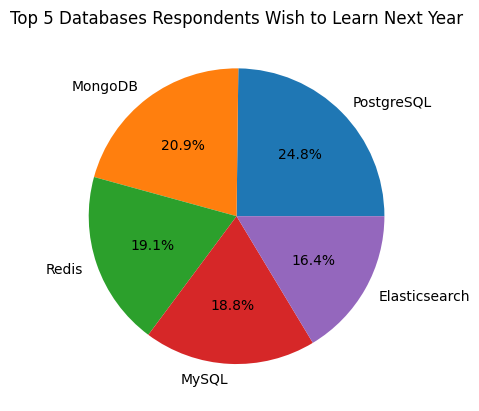

In [128]:
# Plot
plt.figure()
plt.pie(top_5['Total_Respondents'], labels=top_5['Database'], autopct='%1.1f%%')
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

### Stacked Charts


Create a stacked chart of mean `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


In [177]:
# Get WorkWeekHrs and CodeRevHrs for each age in the age group 30-35
data = %sql SELECT Age, WorkWeekHrs, CodeRevHrs FROM master WHERE Age BETWEEN 30 AND 35 
data = pd.DataFrame(data)
data.head()

 * sqlite:///m4_survey_data.sqlite
Done.


,Age,WorkWeekHrs,CodeRevHrs
0,31.0,8.0,3.0
1,34.0,40.0,2.0
2,32.0,40.0,2.0
3,34.0,42.0,15.0
4,33.0,40.0,2.0


In [190]:
# Now get the mean for each age
mean_data = data.groupby('Age').mean().reset_index()
mean_data

,Age,WorkWeekHrs,CodeRevHrs
0,30.0,43.131579,4.696858
1,31.0,41.602746,4.701923
2,32.0,42.650207,5.008557
3,33.0,44.486952,4.724311
4,34.0,43.147583,4.869902
5,35.0,42.451550,4.745130


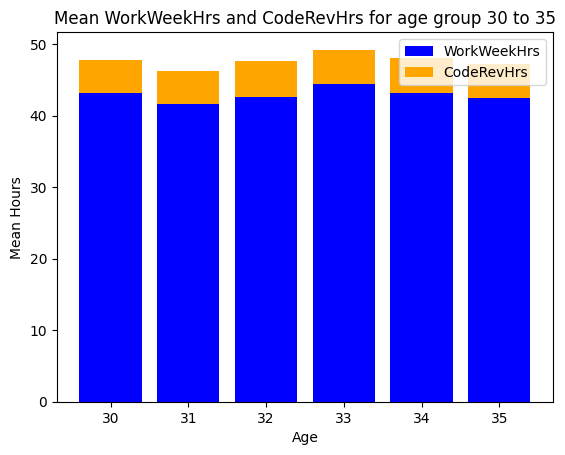

In [194]:
fig, ax = plt.subplots()
ax.bar(mean_data['Age'], mean_data['WorkWeekHrs'], label='WorkWeekHrs', color='blue')
ax.bar(mean_data['Age'], mean_data['CodeRevHrs'], bottom=mean_data['WorkWeekHrs'], label='CodeRevHrs', color='orange')
ax.set_xlabel('Age')
ax.set_ylabel('Mean Hours')
ax.set_title('Mean WorkWeekHrs and CodeRevHrs for age group 30 to 35')
ax.legend()
plt.show()

## 4. Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


In [214]:
# Get the data
data = %sql SELECT Age, ConvertedComp from master WHERE Age BETWEEN 45 and 60
data = pd.DataFrame(data).dropna()
data.head()

 * sqlite:///m4_survey_data.sqlite
Done.


,Age,ConvertedComp
0,47.0,103000.0
2,47.0,54996.0
3,47.0,62807.0
4,45.0,72522.0
5,45.0,54876.0


In [215]:
# Group by age and take the median
median_data = data.groupby('Age').median().reset_index()
median_data.rename(columns={'ConvertedComp': 'Median ConvertedComp'}, inplace=True)
median_data

,Age,Median ConvertedComp
0,45.0,90330.0
1,46.0,91593.0
2,47.0,91606.0
3,48.0,105750.0
4,49.0,85248.0
5,50.0,95000.0
6,51.0,100000.0
7,52.0,105500.0
8,53.0,100463.0
9,54.0,121000.0


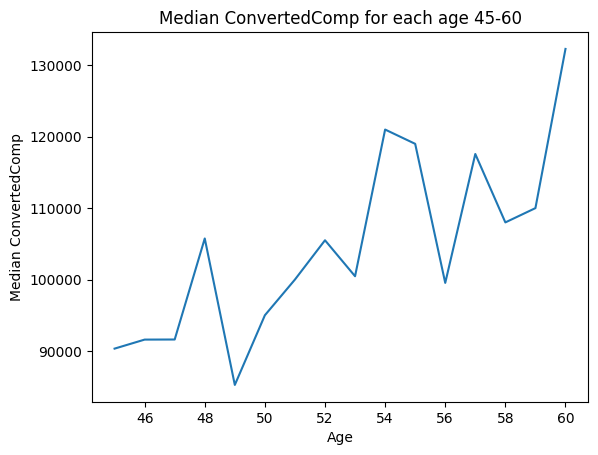

In [216]:
plt.figure()
sns.lineplot(data=median_data, x='Age', y='Median ConvertedComp')
plt.title('Median ConvertedComp for each age 45-60')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


In [217]:
# Get data
data = %sql SELECT MainBranch FROM master
data = pd.DataFrame(data)
data.head()

 * sqlite:///m4_survey_data.sqlite
Done.


,MainBranch
0,I am a developer by profession
1,I am a developer by profession
2,I am a developer by profession
3,I am a developer by profession
4,I am a developer by profession


In [218]:
# Get value counts
main_branch_counts = data['MainBranch'].value_counts()
main_branch_counts

MainBranch
I am a developer by profession                                                   10618
I am not primarily a developer, but I write code sometimes as part of my work      780
Name: count, dtype: int64

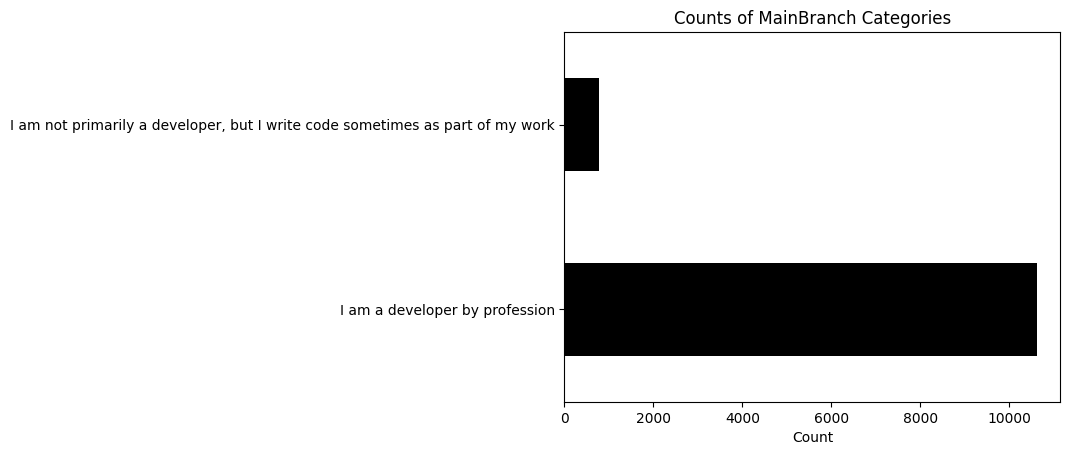

In [229]:
# Plot
fig, ax = plt.subplots()
main_branch_counts.plot(kind='barh', ax=ax, color='black')
ax.set_xlabel('Count')
ax.set_ylabel('')
ax.set_title('Counts of MainBranch Categories')
plt.show()

<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
